# Analise Exploratória de Conjunto de dados para análise de doenças de pele

Para a realização deste trabalho foi escolhido um dataset de doenças demartológicas, com 8 classes distintas. \
O dataset selecionado pode ser encontrado em um repositório do [kaggle](https://www.kaggle.com/datasets/jcwang10000/pumch-isd), contendo dois tipos diferentes de dados, clínicos e dermoscopios.

Para o proposito deste trabalho, a fim de simplificar a classificação das imagens serão tratadas apenas as imagens dermoscópicas.  

Este notebook apresenta uma seção de exploração destes dados, que irão guiar as etapas futuras. Iremos verificar o balanceamento dos dados, as dimenssões das imagens e também será feita uma pequena visualização destes dados.

In [1]:
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [38]:
# Download do Dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jcwang10000/pumch-isd")
print(path)

Using Colab cache for faster access to the 'pumch-isd' dataset.
/kaggle/input/pumch-isd


In [39]:
# Verificando classes do dataset
dataset_path = os.path.join(path, os.listdir(path)[0])
print(f'classes_path: {dataset_path}\n')
classes_name = os.listdir(dataset_path)
print(f'classes:\n' + '\n'.join(classes_name) + '\n')

classes_path = []

for classe in os.listdir(dataset_path):
    classes_path.append(os.path.join(dataset_path, classe))

print("classes_path:\n" + "\n".join(classes_path))

classes_path: /kaggle/input/pumch-isd/PUMCH-ISD

classes:
Acne vulgaris
Pityriasis rosea
Dermatitis_subset1
Rosacea
Lichen planus
Vitiligo
Dermatitis_subset2
Psoriasis
Morphea

classes_path:
/kaggle/input/pumch-isd/PUMCH-ISD/Acne vulgaris
/kaggle/input/pumch-isd/PUMCH-ISD/Pityriasis rosea
/kaggle/input/pumch-isd/PUMCH-ISD/Dermatitis_subset1
/kaggle/input/pumch-isd/PUMCH-ISD/Rosacea
/kaggle/input/pumch-isd/PUMCH-ISD/Lichen planus
/kaggle/input/pumch-isd/PUMCH-ISD/Vitiligo
/kaggle/input/pumch-isd/PUMCH-ISD/Dermatitis_subset2
/kaggle/input/pumch-isd/PUMCH-ISD/Psoriasis
/kaggle/input/pumch-isd/PUMCH-ISD/Morphea


In [42]:
# Isolando imagens dermoscópicas
dermoscopic_images_path = [os.path.join(new_class_path, 'dermoscopy') for new_class_path in classes_path]
print("dermoscopic_images_path:\n" + "\n".join(dermoscopic_images_path))


dermoscopic_images_path:
/kaggle/input/pumch-isd/PUMCH-ISD/Acne vulgaris/dermoscopy
/kaggle/input/pumch-isd/PUMCH-ISD/Pityriasis rosea/dermoscopy
/kaggle/input/pumch-isd/PUMCH-ISD/Dermatitis_subset1/dermoscopy
/kaggle/input/pumch-isd/PUMCH-ISD/Rosacea/dermoscopy
/kaggle/input/pumch-isd/PUMCH-ISD/Lichen planus/dermoscopy
/kaggle/input/pumch-isd/PUMCH-ISD/Vitiligo/dermoscopy
/kaggle/input/pumch-isd/PUMCH-ISD/Dermatitis_subset2/dermoscopy
/kaggle/input/pumch-isd/PUMCH-ISD/Psoriasis/dermoscopy
/kaggle/input/pumch-isd/PUMCH-ISD/Morphea/dermoscopy


classes_length:
  Acne vulgaris: 1179
  Pityriasis rosea: 275
  Dermatitis_subset1: 1255
  Rosacea: 985
  Lichen planus: 826
  Vitiligo: 463
  Dermatitis_subset2: 599
  Psoriasis: 1392
  Morphea: 824


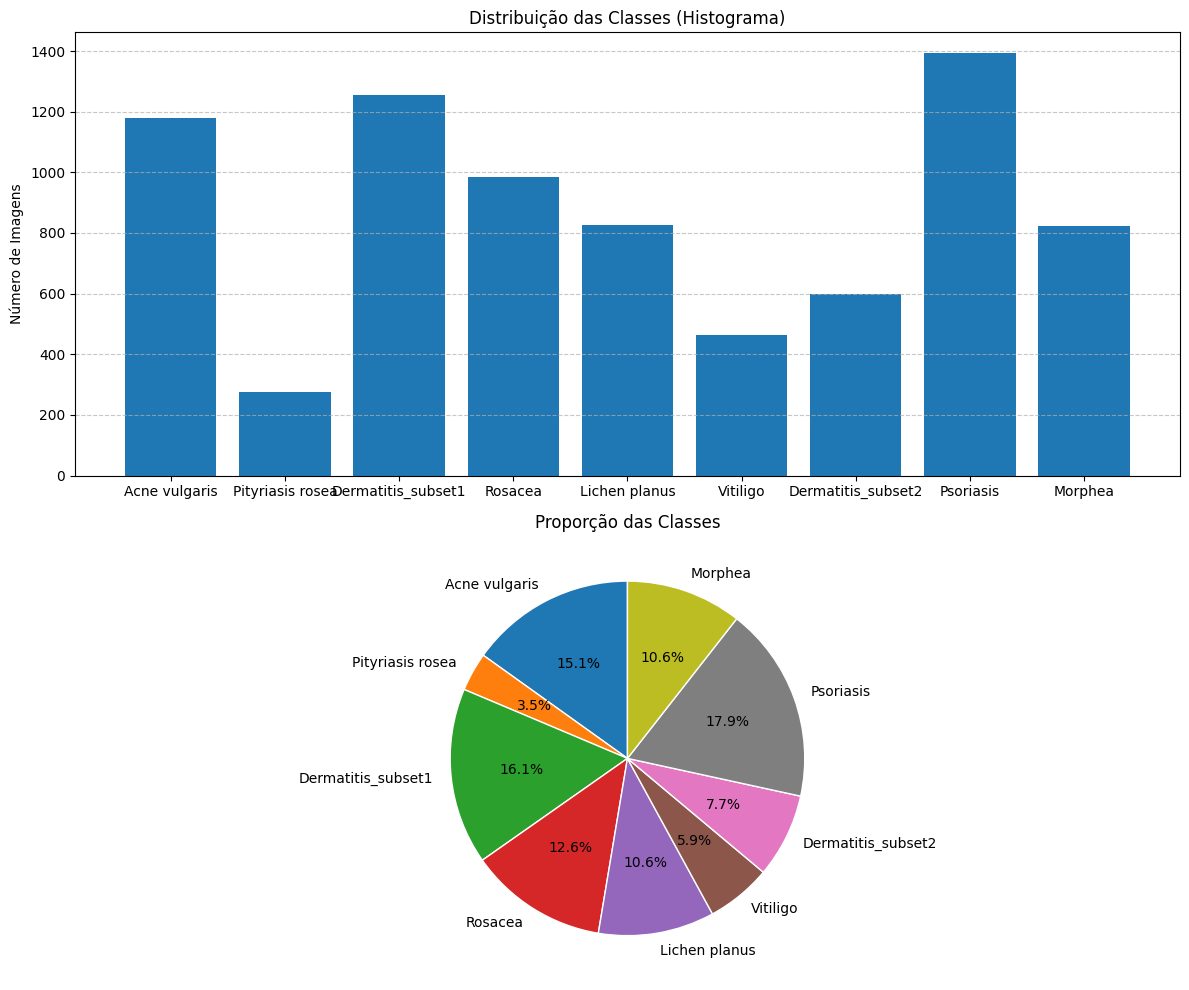

In [63]:
# Verificando o balanceamento das classes

classes_length = [len(os.listdir(dermoscopic_images_path[i])) for i in range(len(dermoscopic_images_path))]
print(f'classes_length:')
for i in range(len(classes_name)):
   print(f'  {classes_name[i]}: {classes_length[i]}')

# Calculando proporções
total_instances = sum(classes_length)
proportions = [classes_length[i] / total_instances for i in range(len(classes_name))]

# Criando subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Subplot 1: Histograma (barras)
axs[0].bar(classes_name, classes_length)
axs[0].set_title('Distribuição das Classes (Histograma)')
axs[0].set_ylabel('Número de Imagens')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Gráfico de Pizza
axs[1].pie(
     proportions,
     labels=classes_name,
     autopct='%1.1f%%',
     startangle=90,
     wedgeprops={'edgecolor': 'white'}
 )
axs[1].set_title('Proporção das Classes')

plt.tight_layout()
plt.show()

O dataset possui um desbalanceamento, com maior quantidade de dados para a classe de psoriase.



In [68]:
# Função para coletar shapes de todas as imagens de um diretório
def collect_shapes(directories):
    shapes = []

    for diretorio in directories:
        for arquivo in os.listdir(diretorio):
            caminho = os.path.join(diretorio, arquivo)
            if os.path.isfile(caminho):
                try:
                    with Image.open(caminho) as img:
                        shapes.append(np.array(img).shape)
                except Exception as e:
                    print(f"Erro ao carregar {arquivo}: {e}")

    return shapes


# Coletando shapes das duas classes
shapes = collect_shapes(dermoscopic_images_path)

# Converter cada shape (array) em tupla
#todos_shapes_tuplas = [tuple(shape) for shape in todos_shapes]

# Verificando se todas as imagens têm o mesmo tamanho
unicos_shapes = list(set(shapes))

print(f"Total de imagens analisadas: {len(shapes)}")
print(f"Total de shapes únicos encontrados: {len(unicos_shapes)}")

# Exibir exemplos de shapes únicos
for i, shape in enumerate(unicos_shapes[:10]):  # mostra até 10
    print(f"{i+1:02d}: {shape}")

if len(unicos_shapes) == 1:
    print(f"Todas as imagens possuem o mesmo shape: {unicos_shapes[0]}")
else:
    print(f"Existem {len(unicos_shapes)} tamanhos diferentes de imagens no dataset.")


Total de imagens analisadas: 7798
Total de shapes únicos encontrados: 1
01: (1053, 1872, 3)
Todas as imagens possuem o mesmo shape: (1053, 1872, 3)


Todas as imagens estão padronizadas em um mesmo shape, não sendo necessário por enquanto nenhum tratamento.


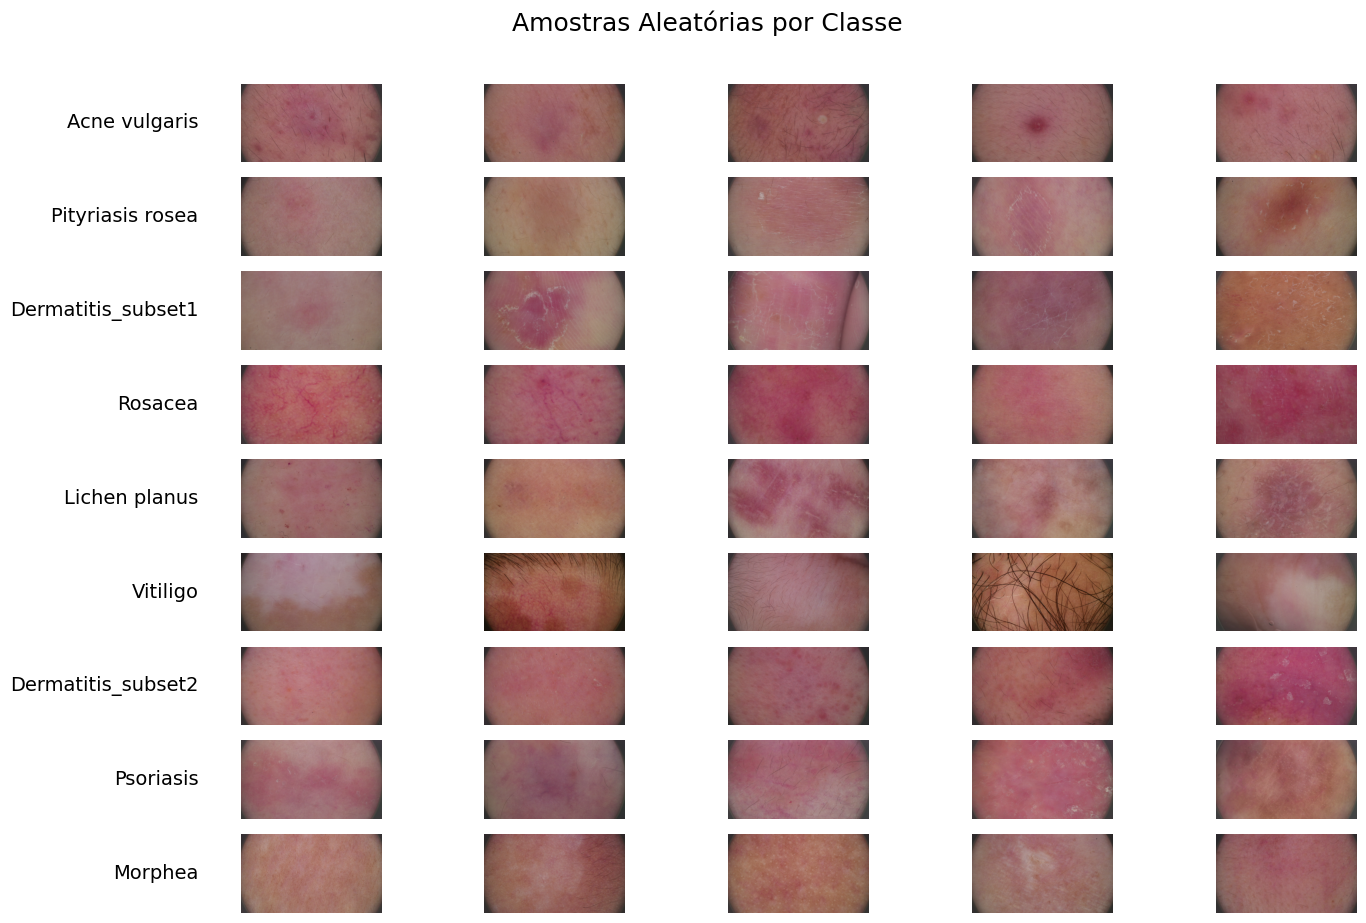

In [77]:
# Exibindo algumas amostras aleatórias de dentro do dataset

# Selecionar 5 imagens aleatórias por classe
def amostrar_imagens(directories, n=5):
    todas_amostras = []

    for directory in directories:
        arquivos = [
            os.path.join(directory, f)
            for f in os.listdir(directory)
            if os.path.isfile(os.path.join(directory, f))
        ]
        amostras = random.sample(arquivos, min(n, len(arquivos)))
        todas_amostras.append(amostras)

    return todas_amostras


# Coletando 5 amostras por classe
amostras_por_classe = amostrar_imagens(dermoscopic_images_path, n=5)

# Exibição das amostras
fig, axs = plt.subplots(
    len(classes_name),
    5,
    figsize=(15, len(classes_name))
)

fig.suptitle("Amostras Aleatórias por Classe", fontsize=18, y=1.02)

for row, (classe, amostras) in enumerate(zip(classes_name, amostras_por_classe)):

    # Título único por linha (posição absoluta na célula da primeira coluna)
    axs[row, 0].text(
        -0.3 , 0.5, classe,
        fontsize=14,
        va='center',
        ha='right',
        transform=axs[row, 0].transAxes
    )

    for col, caminho in enumerate(amostras):
        img = Image.open(caminho)
        axs[row, col].imshow(img)
        axs[row, col].axis('off')

plt.tight_layout()
plt.show()
